In [1]:
import pandas as pd

import os

import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import anndata as ad
import glob
from sklearn.metrics import adjusted_rand_score

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42


In [2]:
import json

# Load configuration
with open("../../config/config_notebooks_TNBC_with_HER2_model.json", "r") as config_file:
    config = json.load(config_file)


In [15]:
## Try to plot the bootstrapped ARI patient values

all_dfs = []
opti_clusts = {}
for model_type, names, benchmark_path in zip([config['retrained_model_list2_type']],
                                            [config['retrained_model_list2']],
                                            [config['retrained_benchmark_folder2']]):
    path_to_unsupervised_clustering = os.path.join(benchmark_path, "invasive_cancer_clustering", "kmeans")
    optimal_clusters = pd.read_csv(os.path.join(path_to_unsupervised_clustering, "optimal_clusters.csv"), index_col=0)
    
    for name in names:
        opti_clusts[name] = optimal_clusters.loc[name, 'n_clusters']

        # print(f"Processing {name}...")
        filename = f"scores_umap_across_parameters_{optimal_clusters.loc[name, 'n_clusters']}_clusters.json"
        with open(os.path.join(path_to_unsupervised_clustering, name, filename), "r") as f:
            model_summary = json.load(f)
            df_ = []
            for min_dist in [0.001, 0.1]:
                d = pd.DataFrame(model_summary[str(min_dist)])
                d = d.T
                d["min_dist"] = min_dist
                df_.append(d)
            df_ = pd.concat(df_)
        
            df_["model"] = name

            all_dfs.append(df_)

In [16]:
df = pd.concat(all_dfs)
df["batch effect mitigation"] = 1 - df["ARI_patient"]

In [17]:
df

,data,labels,cluster_number,silhouette_score,inertia,davies_bouldin_score,calinski_harabasz_score,ARI_patient,min_dist,model,batch effect mitigation
10,umap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, ...",5,0.423326,253999.888303,0.719429,43557.056585,0.289026,0.001,uni,0.710974
30,umap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, ...",5,0.404916,156068.404277,0.7873,40987.440721,0.867175,0.001,uni,0.132825
50,umap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, ...",5,0.394478,131416.164401,0.833809,40948.296038,0.259216,0.001,uni,0.740784
100,umap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, ...",5,0.384981,109084.066906,0.851323,40155.222528,0.16221,0.001,uni,0.83779
150,umap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, ...",5,0.382499,97193.093827,0.854365,40216.993914,0.592527,0.001,uni,0.407473
200,umap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, ...",5,0.382407,89549.413429,0.851739,40634.12389,0.268473,0.001,uni,0.731527
250,umap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0.34222,85847.703552,0.892198,39930.502278,0.607293,0.001,uni,0.392707
300,umap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0.382038,79829.906704,0.841937,41257.771042,0.282537,0.001,uni,0.717463
350,umap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0.377354,77064.093698,0.8581,41086.681332,0.42521,0.001,uni,0.57479
400,umap,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",5,0.373055,74290.287688,0.862453,41417.243822,0.174488,0.001,uni,0.825512


In [18]:
import sys
sys.path.append("../../")
from digitalhistopathology.notebooks_utils import sort_retrained_models

retrained_models = config['retrained_model_list1'] + config['retrained_model_list2']
sorted_retrained_models = sort_retrained_models(retrained_models)





In [19]:
sorted_retrained_models

['uni',
 'uni_full_koleo_4096_prototypes',
 'HER2_uni_full_koleo_16384_prototypes']

In [20]:
# make 'model' a categorical with the desired order (append any unseen models at the end),
# then sort the dataframe by that categorical order
desired = list(sorted_retrained_models)
present_in_desired = [m for m in desired if m in df['model'].unique()]
others = [m for m in df['model'].unique() if m not in present_in_desired]
new_order = present_in_desired + others

df['model'] = pd.Categorical(df['model'], categories=new_order, ordered=True)
df = df.sort_values('model').reset_index(drop=True)

# quick check
print(df['model'].cat.categories)

Index(['uni', 'uni_full_koleo_4096_prototypes',
       'HER2_uni_full_koleo_16384_prototypes'],
      dtype='object')


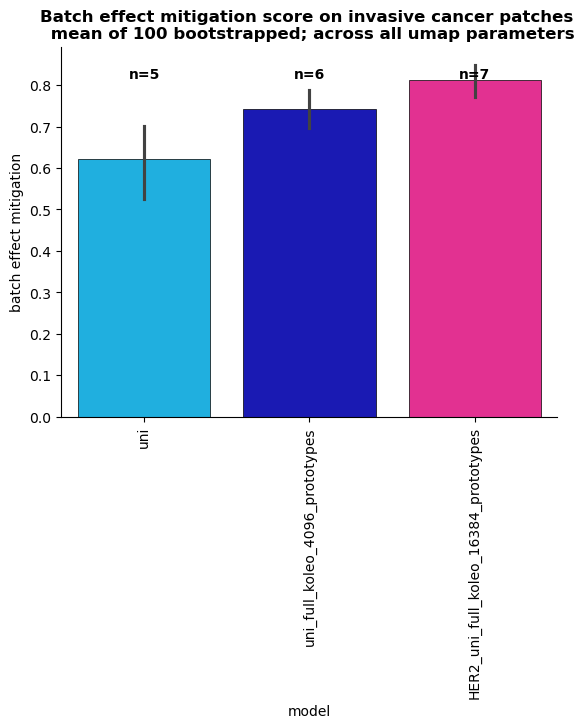

In [22]:
sns.barplot(data=df, x="model", y="batch effect mitigation", linewidth=0.5,
            edgecolor="black", palette=config["retrained_color_palette"])
sns.despine()
plt.xticks(rotation=90);
plt.title(f"Batch effect mitigation score on invasive cancer patches \n mean of 100 bootstrapped; across all umap parameters",
           weight='bold')

for i, n in opti_clusts.items():
    plt.text(x=i, y=0.81, s=f"n={n}", ha='center', va='bottom', weight='bold')